### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


(1) What is the independent variable? What is the dependent variable?

Independent Variable - A congruent and incongruent words condition.
Dependent Variable - Time measure to complete test

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

Null Hypothsis, H0 - There is no change in time between two measuring congruent or incongruent task.
Alternate Hypothesis, H1 - Incongruent task takes more time than congruent task.
H0: μi ≤ μc (μi - Population mean of incongruent values, μc - Population mean of congruent values)

H1: μi > μc (μi - Population mean of incongruent values, μc - Population mean of congruent values)

Two tailed statistical test

We will compute the significant difference between two means(Population mean of incongruent values, μc - Population mean of congruent values) and will assume distributions are nearly normal.Our sample size will be less than 40 and we will calculate the standard deviations.

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from scipy.stats import t
from scipy import stats
%matplotlib inline

In [2]:
#Reading Stroop Data CSV File
df = pd.read_csv('stroopdata.csv')

In [3]:
#Calculating Mean of Congruent and Incongruent Tasks
print("Mean of congruent",df['Congruent'].mean(axis=0))
print("Mean of incongruent",df['Incongruent'].mean(axis=0))

#Difference of mean
diff_mean=df['Incongruent'].mean(axis=0)-df['Congruent'].mean(axis=0)

Mean of congruent 14.051124999999999
Mean of incongruent 22.015916666666666


In [4]:
#Calculating Median of Congruent and Incongruent Tasks
print("Median of congruent",df['Congruent'].median(axis=0))
print("Median of incongruent",df['Incongruent'].median(axis=0))

#Difference of median
diff_median=df['Incongruent'].median(axis=0)-df['Congruent'].median(axis=0)

Median of congruent 14.3565
Median of incongruent 21.0175


In [5]:
#Calculating Standard Deviation of Congruent and Incongruent Tasks
print("Standard Deviation for congruent",df['Congruent'].std(axis=0))
print("Standard Deviation for incongruent",df['Incongruent'].std(axis=0))

#Difference of standard deviation
diff_std=(df['Incongruent']-df['Congruent']).std(axis=0)


Standard Deviation for congruent 3.5593579576451955
Standard Deviation for incongruent 4.797057122469138


Standard Deviation for congruent and incongruent are 3.559 and 4.797.

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

C:\Users\User\venv\datawrangling\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


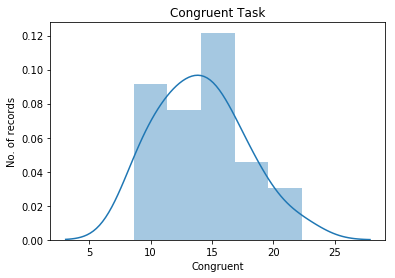

In [6]:
# Plot for Congruent Task
plt.xlabel('Congruent')
plt.ylabel('No. of records')
plt.title('Congruent Task')
sns.distplot(df['Congruent'],hist=True)


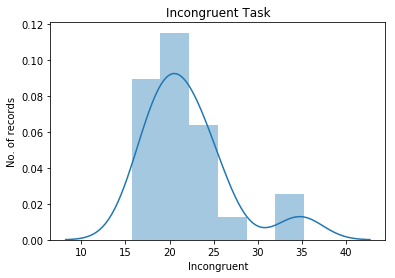

In [7]:
# Plot for Incongruent Task
plt.xlabel('Incongruent')
plt.ylabel('No. of records')
plt.title('Incongruent Task')
sns.distplot(df['Incongruent'],hist=True)

The plots are normally distributed and but Incongruent task is  rightly skewed.

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

# Paired t-test

In [8]:
#Calculating t and p value
stats.ttest_rel(df['Incongruent'], df['Congruent'])

Ttest_relResult(statistic=8.020706944109957, pvalue=4.103000585711178e-08)

Since, pvalue is less than 0.05 so the null hypothesis is rejected.This implies that congruent task takes less time than incongruent task.


# Statistical t-Test

In [9]:
# Perform the statistical test here
print(df['Congruent'].size)
print(df['Incongruent'].size)
#t-critical value for a 95% confidence level and 23 d.f.
t.ppf(0.95, 23)

# Difference of mean and standard deviation
print("Difference of mean and standard deviation is",diff_mean,diff_std)

24
24
Difference of mean and standard deviation is 7.964791666666667 4.864826910359056


For 95% Confidence Interval with a Degree of Freedom 23, t critical value is 1.7139

In [10]:
#Computation of Test Statistic value
test=diff_mean/(diff_std / math.sqrt(24))
print("Test Statistic value is",test)


Test Statistic value is 8.020706944109957


Our Test Statistic value which is 8.02 is greater than the critical value i.e. 1.71 so our hypothesis is rejected.This implies that congruent task takes less time than incongruent task.
